# Chatting With Transformers:
Chat models are conversational AIs that you can send and receive messages with. There are now many open-source chat models.

We’ll start with a brief quickstart guide that uses a convenient, high-level “pipeline”.

Chat models continue chats. This means that you pass them a conversation history, which can be as short as a single user message, and the model will continue the conversation by adding its response. Let’s see this in action. First, build a chat:

In [1]:
!pip install markupsafe==2.1.5
# need to load with first use of python to prevent conflict later (loading gradio)

chat = [
    {"role": "system", "content": "You are a physician in an emergency department. You need to choose the best answer A, B, C, or D, and provide an explanation of why that options was chosen."},
    {"role": "user", "content": "A 24-year-old pregnant woman at 28 weeks gestation presents to the emergency department with complaints of fever with chills and pain in her knee and ankle joints for the past 2 days. she also complains of headaches and difficulty moving her neck. further questioning reveals that she had a tick bite on her arm while gardening a few days ago. pregnancy is progressing normally. on examination, an erythematous rash is seen on her right arm. her obstetric examination is normal. ultrasound of fetus is reassuring with normal heartbeat and no gross abnormalities. a specimen is collected to test for lyme disease. what is the next best step for this patient? A) Ibuprofen B) Tetracycline C) Amoxicilin D) Gentamincin"}
]

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


This chat adds a system message at the start of the conversation.
The Huggingface MedLLM Leaderboard lists a number of LLMs.
One of the best is MedLLama3. That will be used here because it's easy to set up.
We need to add this for MedLLama3 to work well.

The system message represents a high-level directive about how the model should behave in the conversation.

You can use the system message to guide the model - whether you want short or long responses, lighthearted or serious ones, and so on.

The system message you can be omitted or you can try a terse one such as “You are a helpful and intelligent AI assistant who responds to user queries.”

# Continue A Chat

Once you have a chat, the next step with Hugging Face is to use the TextGenerationPipeline.

# What's in a pipeline?
Each pipeline provides a simplified way to conduct training and testing by taking a bunch of parameters up-front, then carrying on most of the work without multiple python calls.
For example: The TextGenerationPipeline takes a minimum of two parameters:
* Model: The model that will be used by the pipeline to make predictions
* Tokenizer: The tokenizer that will be used by the pipeline to encode data for the model.
* torch_dtype: (optional parameter) The data type to use to hold the available precision for this model. For example: torch.btype16 will hold a 16 bit floating point number.
* device_map: (optional parameter) This will load the model on GPU if there’sin!pip !           cvm,vcm,vcm,vc enough memory for it.
ll

Setup your Colab Secret: HF_TOKEN or you will get an error. Use the secrets editor by hitting the key icon in the left nav bar.

Also, make sure to be logged into Hugging Face with permissions on that gated repo. or you will get this:
GatedRepoError: 401 Client Error

In [ ]:
#!pip install markupsafe==3.0.2

import torch
import os
from transformers import pipeline

from huggingface_hub import notebook_login
from google.colab import userdata

print(os.environ.get('HF_TOKEN'))
notebook_login(os.environ.get('HF_TOKEN'))

pipe = pipeline("text-generation", "ProbeMedicalYonseiMAILab/medllama3-v20", torch_dtype=torch.bfloat16, device_map="auto")
response = pipe(chat, max_new_tokens=512)
print(response[0]['generated_text'][-1]['content'])

None


config.json:   0%|          | 0.00/706 [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

What's in a pipeline?

1. Model, data set and tokenizer are loaded from the Hugging Face Hub.
  * Model: [ProbeMedicalYonseiMAILab/medllama3-v20](https://huggingface.co/ProbeMedicalYonseiMAILab/medllama3-v20)

  * Data Set: [llama3-instruct] (https://huggingface.co/meta-llama/Meta-Llama-3-8B?text=Once+upon+a+time%2C#llama-3-instruct)
2. The chat is formatted using the tokenizer’s chat template.
3. The formatted chat is tokenized using the tokenizer.
4. We generate a response from the model.
5. The tokens output by the model are decoded back to a string




You can continue the chat by appending your own response to it.
The response object returned by the pipeline actually contains the entire chat so far, so we can simply append a message and pass it back:

In [ ]:
chat = response[0]['generated_text']
chat.append(
    {"role": "user", "content": "Where can I get Ibuprofen?"}
)
response = pipe(chat, max_new_tokens=512)
print(response[0]['generated_text'][-1]['content'])

Choose a medical question for demonstration:
The Huggingface Med LLM dashboard uses the following question as an example of a passing and failing answer.

In the case of the pregnant woman, the correct answer is C) Amoxicillin.

If the question is asked for a woman, the correct answer is B) Tetracycline

In [7]:
!pip install gradio

from transformers import pipeline
import gradio as gr

chat = [
    {"role": "system", "content": "You are a physician in an emergency department. You need to choose the best answer A, B, C, or D, and provide an explanation of why that options was chosen."},
    {"role": "user", "content": "A 24-year-old woman presents to the emergency department with complaints of fever with chills and pain in her knee and ankle joints for the past 2 days. she also complains of headaches and difficulty moving her neck. further questioning reveals that she had a tick bite on her arm while gardening a few days ago. on examination, an erythematous rash is seen on her right arm. a specimen is collected to test for lyme disease. what is the next best step for this patient? A) Ibuprofen B) Tetracycline C) Amoxicilin D) Gentamincin"}
]

def mini_chatbot(message, history):
  #chat = history
  chat.append(
    {"role": "user", "content": message}
)
  response2 = pipe(chat, max_new_tokens=512)
  return response2[0]['generated_text'][-1]['content']

demo_chatbot = gr.ChatInterface(mini_chatbot,
                                title="My Chatbot",
                                description="Enter text to start chatting.")

/usr/local/lib/python3.10/dist-packages/gradio/components/chatbot.py:243: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


Links:
* Medium:
https://medium.com/@anu.surabhi1980/building-a-simple-chatbot-with-transformers-and-gradio-c7913c21217f


In [8]:
demo_chatbot.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://250d524a1650994673.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Samples to past into the GUI:
1. Next step for woman with chills.

  A 24-year-old woman presents to the emergency department with complaints of fever with chills and pain in her knee and ankle joints for the past 2 days. she also complains of headaches and difficulty moving her neck. further questioning reveals that she had a tick bite on her arm while gardening a few days ago. on examination, an erythematous rash is seen on her right arm. her obstetric examination is normal. a specimen is collected to test for lyme disease. what is the next best step for this patient? A) Ibuprofen B) Tetracycline C) Amoxicilin D) Gentamincin
  
2. Next step for ***pregnant*** woman with chills.

  A 24-year-old pregnant woman at 28 weeks gestation presents to the emergency department with complaints of fever with chills and pain in her knee and ankle joints for the past 2 days. she also complains of headaches and difficulty moving her neck. further questioning reveals that she had a tick bite on her arm while gardening a few days ago. pregnancy is progressing normally. on examination, an erythematous rash is seen on her right arm. her obstetric examination is normal. ultrasound of fetus is reassuring with normal heartbeat and no gross abnormalities. a specimen is collected to test for lyme disease. what is the next best step for this patient? A) Ibuprofen B) Tetracycline C) Amoxicilin D) Gentamincin



# Specialist domains

Some models may be specialized for certain domains, such as medical or legal text, or non-English languages. If you’re working in these domains, you may find that a specialized model will give you big performance benefits. Don’t automatically assume that, though! Particularly when specialized models are smaller or older than the current cutting-edge, a top-end general-purpose model may still outclass them. Thankfully, we are beginning to see domain-specific leaderboards that should make it easier to locate the best models for specialized domains.

Check the article here to see over 20 Large Language Models in Healthcare.

https://huggingface.co/blog/leaderboard-medicalllm
https://github.com/huggingface/blog/blob/main/leaderboard-medicalllm.md



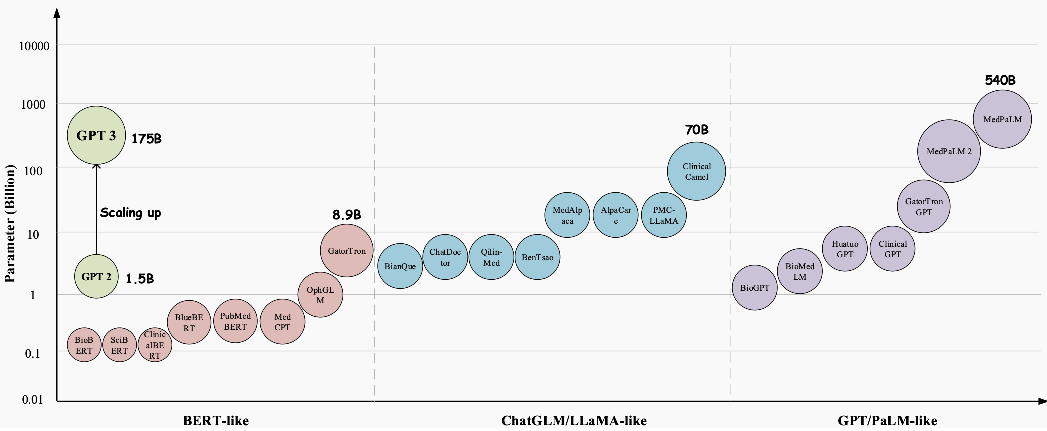


Links:

@misc{Medical-LLM Leaderboard,
author = {Ankit Pal, Pasquale Minervini, Andreas Geert Motzfeldt, Aryo Pradipta Gema and Beatrice Alex},
title = {openlifescienceai/open_medical_llm_leaderboard},
year = {2024},
publisher = {Hugging Face},
howpublished = "\url{https://huggingface.co/spaces/openlifescienceai/open_medical_llm_leaderboard}"
}

@article{llama3modelcard,

title={Llama 3 Model Card},

author={AI@Meta},

year={2024},

url = {https://github.com/meta-llama/llama3/blob/main/MODEL_CARD.md}

}